In [109]:
from xml.dom import minidom
import pandas as pd
pd.options.display.max_columns=100
pd.options.display.max_rows=1000
import xmltodict
import json
import glob
from tqdm import tqdm
import geopandas as gpd
tqdm.pandas()
import shapely
from shapely import geometry
from shapely import wkt
import re

In [2]:
foldername = "BAGGEM0518L-15122020/0518GEM15122020/0518VBO15122020/"
files = [file for file in glob.glob(f"{foldername}/*.xml")]

In [3]:
res = []
for file in tqdm(files, total=len(files)):
    with open(file) as xml_file:
        data_dict = xmltodict.parse(xml_file.read())
    
    json_data = json.dumps(data_dict)
    res.append(json.loads(json_data))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:51<00:00,  2.23s/it]


In [28]:
issues = []
a=res[0]['sl-bag-extract:bagStand'].get('sl:standBestand')["sl:stand"][0]['sl-bag-extract:bagObject']['Objecten:Verblijfsobject']
res_keys = {k:[] for k in a.keys()}
k=0
for data in res:
    for num in range(len(data['sl-bag-extract:bagStand'].get('sl:standBestand')["sl:stand"])):
        k+=1
        a=data['sl-bag-extract:bagStand'].get('sl:standBestand')["sl:stand"][num]['sl-bag-extract:bagObject']['Objecten:Verblijfsobject']
        for index, key in enumerate(a.keys()):
            try:
                res_keys[key].append(a[key])
            except:
                issues.append(k)
                continue

In [29]:
df = pd.DataFrame(columns = list(res_keys.keys()))
for index, key in enumerate(res_keys.keys()):
    df[key] = res_keys[key]

In [30]:
# ok = df[~df.index.isin(issues)]
# problematic = df.iloc[issues].copy()

# problematic.columns = ['Objecten:heeftAlsHoofdadres', 'Objecten:voorkomen', 'Objecten:maaktDeelUitVan', 'Objecten:identificatie', 'Objecten:geometrie',
#                            'Objecten:gebruiksdoel', 'Objecten:oppervlakte', 'Objecten:status', 'Objecten:geconstateerd', 'Objecten:documentdatum',
#                            'Objecten:documentnummer']
# df = pd.concat([ok, problematic])

In [31]:
# keynames = list(df['Objecten:heeftAlsHoofdadres'][100].get('Objecten-ref:NummeraanduidingRef').keys())
_keys = {k:[] for k in df['Objecten:heeftAlsHoofdadres'][100].get('Objecten-ref:NummeraanduidingRef').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:heeftAlsHoofdadres'][i].get('Objecten-ref:NummeraanduidingRef').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 499354/499354 [00:05<00:00, 93836.65it/s]


In [32]:
new_keys = [f"heeftAlsHoofdadres-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [33]:
heeftAlsHoofdadres = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    heeftAlsHoofdadres[key] = _keys[key]
    
df = pd.concat([df, heeftAlsHoofdadres],axis=1)

In [34]:
_keys = {k:[] for k in df['Objecten:voorkomen'][100].get('Historie:Voorkomen').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:voorkomen'][i].get('Historie:Voorkomen').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 499354/499354 [00:09<00:00, 50667.94it/s]


In [35]:
# new_keys = [f"voor-{k}" for k in _keys.keys()]
# for key,n_key in zip(_keys.keys(), new_keys):
#     _keys[n_key] = _keys.pop(key)

In [36]:
voorkomen = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    voorkomen[key] = _keys[key]
    
df = pd.concat([df, voorkomen],axis=1)

In [37]:
_keys = {k:[] for k in df['Historie:BeschikbaarLV'][100].keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Historie:BeschikbaarLV'][i].get(key))
        except:
            _keys[key].append(None)

100%|██████████████████████████████████████████████████████████████████████| 499354/499354 [00:02<00:00, 184466.13it/s]


In [38]:
new_keys = [f"Historie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [39]:
Historie = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    Historie[key] = _keys[key]
    
df = pd.concat([df, Historie],axis=1)

In [40]:
# keynames = list(df["Objecten:identificatie"][100].keys())
_keys = {k:[] for k in df["Objecten:identificatie"][100].keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df["Objecten:identificatie"][i].get(key))
        except:
            _keys[key.append(None)]

100%|██████████████████████████████████████████████████████████████████████| 499354/499354 [00:04<00:00, 100577.43it/s]


In [41]:
new_keys = [f"identificatie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [42]:
identificatie = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    identificatie[key] = _keys[key]
    
df = pd.concat([df, identificatie],axis=1)

In [43]:
# keynames = list(df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys())
_keys = {k:[] for k in df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:geometrie'][i].get('Objecten:punt').get("gml:Point").get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 499354/499354 [00:07<00:00, 66507.71it/s]


In [44]:
new_keys = [f"geometrie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [45]:
geometries = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    geometries[key] = _keys[key]
    
df = pd.concat([df, geometries],axis=1)

In [46]:
_keys = {k:[] for k in df['Objecten:maaktDeelUitVan'][100].get('Objecten-ref:PandRef').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:maaktDeelUitVan'][i].get('Objecten-ref:PandRef').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 499354/499354 [00:05<00:00, 99867.70it/s]


In [47]:
new_keys = [f"maaktDeelUitVan-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [48]:
maaktDeelUitVan = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    maaktDeelUitVan[key] = _keys[key]
    
df = pd.concat([df, maaktDeelUitVan],axis=1)

In [58]:
df.to_csv("VBO.csv", index=False)

In [52]:
df_clear = df.copy()
del df['Objecten:gebruiksdoel']
del df['Objecten:maaktDeelUitVan']

In [56]:
df.to_parquet("VBO.parquet")

## Loading from parquet and converting to gdf.

In [112]:
df = pd.read_parquet("VBO.parquet")

In [113]:
def wkt_loads(x):
    try:
        geom = wkt.loads(x)
    except:
        geom=None
    return geom

In [114]:
df['geometry'] = [f"POINT({i})" for i in df["geometrie-gml:pos"]]
df['geometry'] = df['geometry'].progress_apply(lambda x: wkt_loads(x))

 90%|███████████████████████████████████████████████████████████████▉       | 449383/499354 [00:09<00:00, 57263.10it/s]ParseException: Expected number but encountered word: 'None'
ParseException: Expected number but encountered word: 'None'
 91%|████████████████████████████████████████████████████████████████▉      | 456772/499354 [00:09<00:00, 60479.56it/s]ParseException: Expected number but encountered word: 'None'
ParseException: Expected number but encountered word: 'None'
ParseException: Expected number but encountered word: 'None'
 93%|█████████████████████████████████████████████████████████████████▉     | 464033/499354 [00:10<00:00, 62355.89it/s]ParseException: Expected number but encountered word: 'None'
ParseException: Expected number but encountered word: 'None'
ParseException: Expected number but encountered word: 'None'
100%|███████████████████████████████████████████████████████████████████████| 499354/499354 [00:10<00:00, 47446.36it/s]


In [115]:
df = gpd.GeoDataFrame(df, geometry="geometry")

<AxesSubplot:>

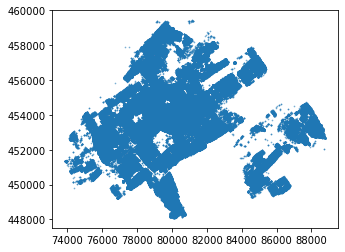

In [116]:
df.plot(markersize=0.5, alpha=0.5)